In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

In [11]:
class BfsTraverser: 
  # Constructor 
  def __init__(self): 
    self.visited = []
    self.end_search = False
  def BFS(self,graph, start_node, goal_node):
    queue = []
    queue.append(start_node)
    #print(queue)
    #set of visited nodes
    self.visited.append(start_node)
    while queue and not self.end_search: 
      # Dequeue a vertex from 
      s = queue.pop(0)          

      # Get all adjacent vertices of the 
      # dequeued vertex s. If a adjacent 
      # has not been visited, then mark it 
      # visited and enqueue it 
      for i in list(graph[s]):
        if i not in self.visited:
          #print ("Command; Drive from ",s," to " ,i, " Estate/Junction", end = "\n") 
          #print("Current Node is",i, " but the goal Node is ",goal_node)
          print ("Command; Drive to " ,i, " Estate/Junction", end = "\n")
          if i is goal_node:
            print("We have reached ",i," the final destination")
            self.visited.append(i)
            self.end_search = True
            break
          else:
            #print("Here",self.end_search)
            queue.append(i)
            #visited[i] = True
            self.visited.append(i)

Initialize the network and add nodes

In [3]:
G = nx.Graph()
nodes=["Karen","J6","Gitaru","J1","J4","J7"]
G.add_nodes_from(nodes)
G.nodes()

NodeView(('Karen', 'J6', 'Gitaru', 'J1', 'J4', 'J7'))

Add Edges and their weights to the Nodes

In [4]:
G.add_edge("Karen","J1",weight="2.8")
G.add_edge("Karen","J6",weight="4")
G.add_edge("J1","J4",weight="2.6")
G.add_edge("J6","Gitaru",weight="10")
G.add_edge("J6","J7",weight="6")
G.add_edge("J6","J4",weight="6")
G.add_edge("Gitaru","J7",weight="6")

View the Initial graph

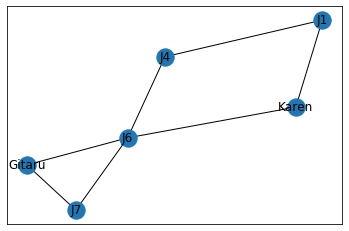

In [5]:
nx.draw_networkx(G)

Position the nodes to resemble Nairobis map

In [6]:
G.nodes["Karen"]['pos']=(0,0)
G.nodes["J6"]['pos']=(0,2)
G.nodes["J1"]['pos']=(2,-2)
G.nodes["J4"]['pos']=(4,-2)
G.nodes["J7"]['pos']=(0,4)
G.nodes["Gitaru"]['pos']=(-1,3)

Store all positions in a variable

In [7]:
node_pos = nx.get_node_attributes(G,'pos')

Call BFS class to return set of all considered nodes to the possible routes to the goal

In [12]:
route_bfs = BfsTraverser()
routes = route_bfs.BFS(G,"Karen","Gitaru")
print("\n Considered routes are: ",route_bfs.visited)

Command; Drive to  J1  Estate/Junction
Command; Drive to  J6  Estate/Junction
Command; Drive to  J4  Estate/Junction
Command; Drive to  Gitaru  Estate/Junction
We have reached  Gitaru  the final destination

 Considered routes are:  ['Karen', 'J1', 'J6', 'J4', 'Gitaru']


color the nodes and edges in the route_bfs list

In [9]:
route_list = route_bfs.visited
node_col = ['darkturquoise' if not node in route_list else 'peru' for node in G.nodes()]
peru_colored_edges = list(zip(route_list,route_list[1:]))
edge_col = ['darkturquoise' if not edge in peru_colored_edges else 'peru' for edge in G.edges()]
#print(peru_colored_edges)

Draw the final Network

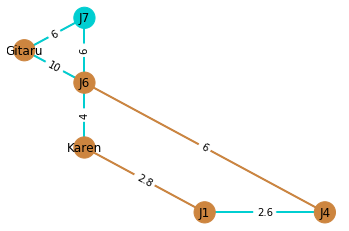

In [10]:
arc_weight=nx.get_edge_attributes(G,'weight')
nx.draw_networkx(G, node_pos,node_color= node_col, node_size=450)
nx.draw_networkx_edges(G, node_pos,width=2,edge_color= edge_col)
nx.draw_networkx_edge_labels(G, node_pos, edge_labels=arc_weight)
plt.axis('off')
plt.show()